## This notebook predicts the diseases on the basis of 48 parameters from the dataset, after doing PCA. There are 2 models used for the same:

###  1. ANN(Softmax Regression)
###  2. Random Forest Algorithm

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

## Taking the Dataset as input

In [3]:
Train_data=pd.read_csv("Training.csv")
Test_data=pd.read_csv("Testing.csv")

In [4]:
train_df=pd.DataFrame(Train_data)
train_df.head(15)
train_df=train_df.drop(['Unnamed: 133'],axis=1)
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Listing the features and target variables in dataset

In [4]:
# list(train_df.columns)

In [5]:
test_df=pd.DataFrame(Test_data)
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Dropping the least significant parameters from the dataset

In [6]:
y_train=train_df['prognosis']
x_train=train_df.drop(['malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'neck_pain',
 'dizziness',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extremeties',
 'excessive_hunger',
 'extra_marital_contacts',
 'drying_and_tingling_lips',
 'slurred_speech',
 'knee_pain',
 'hip_joint_pain',
 'muscle_weakness',
 'stiff_neck',
 'swelling_joints',
 'movement_stiffness',
 'spinning_movements',
 'loss_of_balance',
 'unsteadiness',
 'weakness_of_one_body_side',
 'loss_of_smell',
 'bladder_discomfort',
 'foul_smell_of urine',
 'continuous_feel_of_urine',
 'passage_of_gases',
 'internal_itching',
 'toxic_look_(typhos)',
 'depression',
 'irritability',
 'muscle_pain',
 'altered_sensorium',
 'red_spots_over_body',
 'belly_pain',
 'abnormal_menstruation',
 'dischromic _patches',
 'watering_from_eyes',
 'increased_appetite',
 'polyuria',
 'family_history',
 'mucoid_sputum',
 'rusty_sputum',
 'lack_of_concentration',
 'visual_disturbances',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'distention_of_abdomen',
 'history_of_alcohol_consumption',
 'fluid_overload.1',
 'blood_in_sputum',
 'prominent_veins_on_calf',
 'palpitations',
 'painful_walking',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose',
 'yellow_crust_ooze',
 'prognosis'],axis=1)
y_train.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
print(x_train.shape)

(4920, 48)


In [8]:
test_df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [9]:
x_test=test_df.drop(['malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'neck_pain',
 'dizziness',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extremeties',
 'excessive_hunger',
 'extra_marital_contacts',
 'drying_and_tingling_lips',
 'slurred_speech',
 'knee_pain',
 'hip_joint_pain',
 'muscle_weakness',
 'stiff_neck',
 'swelling_joints',
 'movement_stiffness',
 'spinning_movements',
 'loss_of_balance',
 'unsteadiness',
 'weakness_of_one_body_side',
 'loss_of_smell',
 'bladder_discomfort',
 'foul_smell_of urine',
 'continuous_feel_of_urine',
 'passage_of_gases',
 'internal_itching',
 'toxic_look_(typhos)',
 'depression',
 'irritability',
 'muscle_pain',
 'altered_sensorium',
 'red_spots_over_body',
 'belly_pain',
 'abnormal_menstruation',
 'dischromic _patches',
 'watering_from_eyes',
 'increased_appetite',
 'polyuria',
 'family_history',
 'mucoid_sputum',
 'rusty_sputum',
 'lack_of_concentration',
 'visual_disturbances',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'distention_of_abdomen',
 'history_of_alcohol_consumption',
 'fluid_overload.1',
 'blood_in_sputum',
 'prominent_veins_on_calf',
 'palpitations',
 'painful_walking',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose',
 'yellow_crust_ooze',
 'prognosis'],axis=1)
y_test=test_df['prognosis']
print(x_train.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
       'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
       'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness',
       'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes'],
      dtype='object')


In [10]:
print(len(test_df['prognosis'].unique()))

41


In [11]:
x_train.shape
x_test.shape
print(x_train[:0])

Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes]
Index: []

[0 rows x 48 columns]


In [12]:
le=LabelEncoder()
dummy=le.fit_transform(train_df['prognosis'])
y_train=pd.DataFrame(dummy)

## Listing the indices of diseases

In [13]:
print(le.classes_)

['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [14]:
y_train.head()
print(y_train)

       0
0     15
1     15
2     15
3     15
4     15
...   ..
4915   0
4916   2
4917  38
4918  35
4919  27

[4920 rows x 1 columns]


In [15]:
dummy=LabelEncoder().fit_transform(test_df['prognosis'])
y_test=pd.DataFrame(dummy)
y_test.head()
len(y_test)

42

In [16]:
model=Sequential([
    Dense(units=200,activation='relu'),
    Dense(units=150,activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=42,activation='softmax')
])

In [17]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])
# model.summary()

In [18]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 2s 11ms/step - loss: 2.9243 - accuracy: 0.4870 - val_loss: 1.4927 - val_accuracy: 0.8810
Epoch 2/10
15/39 [==========>...................] - ETA: 0s - loss: 1.1517 - accuracy: 0.8865

/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 0s 5ms/step - loss: 0.7034 - accuracy: 0.9250 - val_loss: 0.1382 - val_accuracy: 1.0000
Epoch 3/10
39/39 [==============================] - 0s 5ms/step - loss: 0.1486 - accuracy: 0.9764 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 4/10
39/39 [==============================] - 0s 5ms/step - loss: 0.1061 - accuracy: 0.9772 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 5/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0980 - accuracy: 0.9778 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0932 - accuracy: 0.9780 - val_loss: 0.0294 - val_accuracy: 1.0000
Epoch 7/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0933 - accuracy: 0.9752 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 8/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0906 - accuracy: 0.9778 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 9/10
39/39 [=============

In [19]:
prediction=model.predict(x_test)
prediction[1]

2/2 [==============================] - 0s 4ms/step


array([4.7461692e-09, 1.6435408e-07, 2.4311561e-05, 6.0046943e-07,
       9.9988919e-01, 2.3231669e-08, 6.1622024e-10, 5.5971586e-08,
       5.7245795e-09, 1.6171491e-08, 6.2611929e-05, 8.3317726e-09,
       3.4236969e-10, 8.5138536e-06, 6.2321952e-08, 1.3637436e-08,
       1.8837278e-08, 1.1441829e-08, 4.6544962e-08, 1.1448701e-09,
       4.2836783e-09, 7.6365768e-11, 4.4642126e-09, 2.1206081e-06,
       8.1140095e-10, 7.6517477e-09, 1.7863783e-08, 2.6880483e-07,
       4.4893270e-08, 7.3542328e-06, 7.2021504e-07, 1.9111778e-12,
       1.9102707e-08, 1.1999697e-08, 1.3638636e-06, 6.8662493e-12,
       1.0786570e-06, 9.5840193e-08, 6.6807559e-07, 5.9117747e-07,
       3.9601888e-10, 1.3729187e-10], dtype=float32)

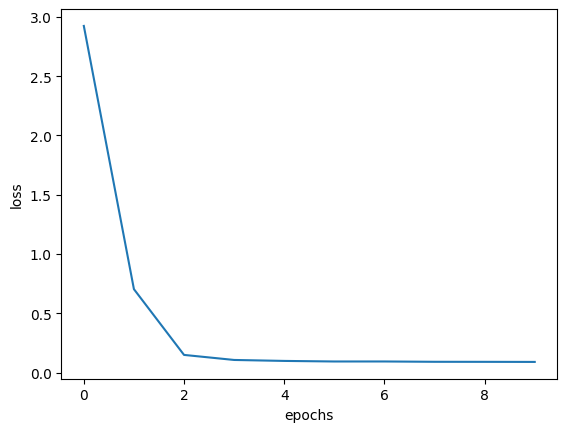

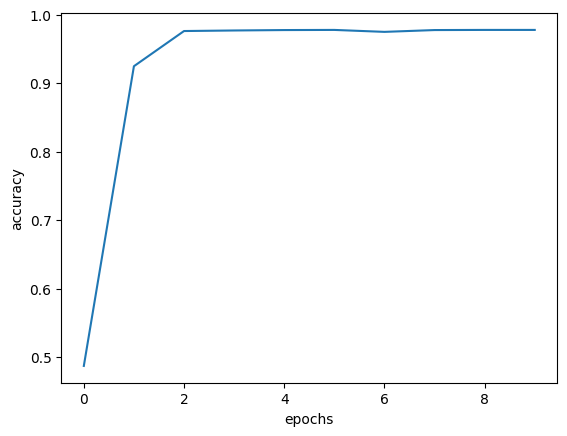

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


In [21]:
pred=np.argmax(prediction, axis=1)
original=y_test[0]
print(original[41])

15


In [22]:
print(y_test.shape[0])

42


In [23]:
confusion = confusion_matrix(original,pred)

fig = px.imshow(confusion, labels=dict(x="Predicted Value", y="Actual Vlaue"),text_auto=True, title='Confusion Matrix')
fig.update_layout(title_x=0.5)
fig.show()

In [24]:
count=0
for i in range(41):
    if(pred[i]-original[i]!=0):
        count+=1

Test_accuracy=(42-count)/42*100
for i in range(10):
    print(f"Predicted: {pred[i]}, Actual: {original[i]}")

Predicted: 15, Actual: 15
Predicted: 4, Actual: 4
Predicted: 16, Actual: 16
Predicted: 9, Actual: 9
Predicted: 14, Actual: 14
Predicted: 33, Actual: 33
Predicted: 1, Actual: 1
Predicted: 12, Actual: 12
Predicted: 17, Actual: 17
Predicted: 6, Actual: 6


In [25]:
print("Test Data Accuracy using ANN=",Test_accuracy,"%")

Test Data Accuracy using ANN= 100.0 %


In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) 
clf.fit(x_train, y_train)

/tmp/ipykernel_20/2396451994.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=42)

In [27]:
rf_predictions = clf.predict(x_test)
print(len(rf_predictions))

42


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared: 1.0


In [29]:
count=0
for i in range(41):
    if(rf_predictions[i]-original[i]!=0):
        count+=1

rf_Test_accuracy=(42-count)/42*100

In [30]:
print(f"Random Forest Test Accuracy:",Test_accuracy,'%')

Random Forest Test Accuracy: 100.0 %


## Saving the Model

In [31]:
from joblib import dump,load

In [32]:
filename = 'rf_model.joblib'
model = clf
dump(model, filename)

['rf_model.joblib']

In [33]:
ml_model=load('/kaggle/working/rf_model.joblib')

In [34]:
inp = np.array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

# Reshape the 1D array into a 2D array with 1 row and 48 columns
inp = inp.reshape(1,-1)

# Make the prediction
prediction = ml_model.predict(inp)
print(prediction)

[26]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [35]:
# -----------------------------------------------------------------END OF THE NOTEBOOK--------------------------------------------------------------